<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/KNN_Tavishi/applying_ML_algorithms/KNN_PRMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Reading CNN features

In [3]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv

In [4]:
df.shape

(4324, 2050)

In [5]:
label_counts = df['2048'].value_counts()
valid_labels = label_counts[label_counts >= 30].index
filtered_df = df[df['2048'].isin(valid_labels)]
filtered_df.to_csv("filtered_dataset.csv", index=False)

In [9]:
filtered_df.drop('Unnamed: 0', axis=1, inplace=True)

<ipython-input-9-30b941df90fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('Unnamed: 0', axis=1, inplace=True)


In [10]:
filtered_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
167,0.385707,0.602069,1.260781,0.047394,1.090125,0.185080,1.039323,0.091425,0.231362,1.055439,...,0.249198,0.345974,0.501077,1.931195,0.042102,1.063489,0.194459,0.393977,0.280082,Guillermo_Coria
168,0.156725,0.460851,1.228696,0.382533,0.735419,0.261050,0.872944,0.170928,0.131577,0.891073,...,0.209309,0.299890,0.758345,1.891940,0.078312,1.163110,0.356572,0.468922,0.020913,Guillermo_Coria
169,0.351734,1.569511,0.437744,0.319587,0.940644,0.331319,1.746337,1.001771,0.159354,0.951299,...,0.422586,0.723228,0.098016,2.080593,0.016298,0.510804,0.391511,0.204749,0.259254,Guillermo_Coria
170,0.238363,0.442549,1.662584,0.085681,2.382488,0.127420,1.288509,0.240999,0.123311,1.332260,...,0.224739,0.195400,0.395690,1.775449,0.042704,0.558439,0.199978,0.288234,0.033883,Guillermo_Coria
171,0.606654,0.769950,0.345878,0.111356,0.857889,0.241741,1.027778,0.266463,0.138748,0.622995,...,0.317204,0.183290,0.416518,1.020964,0.058374,1.384957,0.123883,0.177249,0.236033,Guillermo_Coria


In [11]:
filtered_df.shape

(2370, 2049)

In [ ]:
df_cnn.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
5,5,0.354952,0.935169,1.313525,0.161971,0.743334,0.075382,2.913061,0.339807,0.038969,...,0.042886,0.094991,0.731441,1.846496,0.061113,0.960774,0.152283,0.094486,0.294108,Paul_Bremer
6,6,0.491479,1.098953,0.935011,0.099713,0.859047,0.125197,2.448608,0.194795,0.171454,...,0.197234,0.036094,0.552411,1.532099,0.195461,0.562803,0.054066,0.242185,0.097366,Paul_Bremer
7,7,0.076298,1.872830,1.156564,0.151697,1.786531,0.004271,2.473813,0.183758,0.190911,...,0.025632,0.110004,0.524370,1.041115,0.171625,1.456280,0.096045,0.074930,0.214463,Paul_Bremer
8,8,0.443961,1.489843,1.034748,0.054299,1.201338,0.475425,3.003049,0.170383,0.172904,...,0.170266,0.155772,1.335769,1.501814,0.096764,1.345042,0.470579,0.327874,0.116694,Paul_Bremer
9,9,0.265048,1.558320,0.774199,0.302818,0.905585,0.152244,2.703004,0.314053,0.539273,...,0.076195,0.142454,0.670869,1.724953,0.110348,1.263562,0.008221,0.099455,0.174265,Paul_Bremer


# Train/Test split - for CNN dataset

In [12]:
# Separate features and labels
X_cnn = filtered_df.iloc[:, :-1]
y_cnn = filtered_df.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_cnn)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train_cnn)
X_test_cnn = scaler.transform(X_test_cnn)

print(f"Dataset size: {filtered_df.shape}")
print(f"Training size: {X_train_cnn.shape}, Testing size: {X_test_cnn.shape}")

Dataset size: (2370, 2049)
Training size: (1896, 2048), Testing size: (474, 2048)


# Check

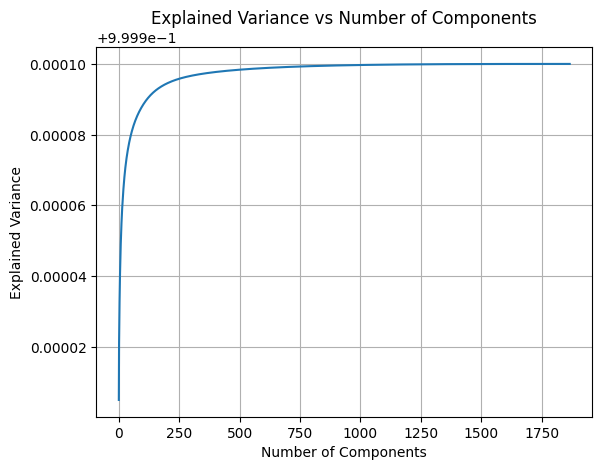

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset (assuming it's in a DataFrame)
df = pd.read_csv("filtered_dataset.csv")  # Replace with actual dataset
X = df.drop(columns=['2048'])  # Drop the label column if present

# Apply PCA
pca = PCA()
pca.fit(X)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()

In [ ]:
print(y_train_cnn[:10])

[ 36 134 146   6  41  23  61  28 134  53]


# Reading HoG features

In [ ]:
url_filtered_HoG_features_dataset="C:/Users/tavis/Downloads/filtered_HOG_features_dataset.csv"
df_hog=pd.read_csv(url_filtered_HoG_features_dataset)

In [ ]:
df_hog.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,70299,70300,70301,70302,70303,70304,70305,70306,70307,70308
0,0,0.147622,0.000000,0.010496,0.01048,0.030300,0.008548,0.005577,0.006585,0.021226,...,0.020418,0.009971,0.008646,0.014164,0.049468,0.003930,0.001001,0.006818,0.021222,Tim_Henman
1,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
2,2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
3,3,0.132761,0.000000,0.000000,0.00000,0.002665,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
4,4,0.202144,0.032098,0.033961,0.02799,0.317099,0.058462,0.033903,0.034219,0.166567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
5,5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
6,6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
7,7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
8,8,0.026542,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.151645,0.034494,0.074602,0.105946,0.305386,0.050689,0.037455,0.000000,0.018227,Tim_Henman
9,9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman


# Train/Test split - for HoG dataset

In [ ]:
# Separate features and labels
X_hog = df_hog.iloc[:, :-1]
y_hog = df_hog.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_hog)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_hog, X_test_hog, y_train_hog, y_test_hog = train_test_split(X_hog, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

print(f"Dataset size: {df_hog.shape}")
print(f"Training size: {X_train_hog.shape}, Testing size: {X_test_hog.shape}")

Dataset size: (4324, 70310)
Training size: (3459, 70309), Testing size: (865, 70309)


# Reading LBP features

In [ ]:
url_filtered_lbp_features = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_LBP_features_dataset.csv'
df = pd.read_csv(url_filtered_lbp_features)

In [ ]:
label_counts = df['256'].value_counts()
valid_labels = label_counts[label_counts >= 30].index
filtered_df = df[df['256'].isin(valid_labels)]
# filtered_df.to_csv("filtered_dataset.csv", index=False)

In [ ]:
print(filtered_df.head())

     Unnamed: 0      0     1      2      3     4     5      6      7      8  \
199         199  747.0  72.0  433.0  185.0  61.0   6.0  224.0  354.0  392.0   
200         200  516.0  33.0  438.0  186.0  34.0   2.0  172.0  316.0  243.0   
201         201  805.0  76.0  366.0  204.0  68.0  10.0  181.0  307.0  537.0   
202         202  572.0  42.0  304.0  219.0  37.0   3.0  247.0  736.0  587.0   
203         203  577.0  49.0  403.0  268.0  87.0   4.0  334.0  641.0  494.0   

     ...    247     248    249   250    251    252    253    254      255  \
199  ...  498.0  3001.0  734.0  36.0  578.0  616.0  546.0  453.0  12702.0   
200  ...  341.0  2309.0  466.0  24.0  354.0  500.0  426.0  516.0  17530.0   
201  ...  529.0  2171.0  559.0  37.0  413.0  581.0  438.0  537.0  22703.0   
202  ...  624.0  3621.0  582.0  28.0  273.0  590.0  465.0  315.0   3466.0   
203  ...  564.0  1535.0  548.0  21.0  284.0  500.0  448.0  280.0   4402.0   

               256  
199  George_W_Bush  
200  George_W_Bush  

In [ ]:
df_LBP.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,256
0,0,589.0,57.0,319.0,205.0,67.0,4.0,195.0,466.0,370.0,...,474.0,1924.0,612.0,26.0,357.0,592.0,523.0,328.0,6088.0,Tim_Henman
1,1,1012.0,113.0,383.0,203.0,76.0,11.0,205.0,369.0,505.0,...,591.0,2086.0,681.0,29.0,447.0,699.0,535.0,486.0,13472.0,Tim_Henman
2,2,920.0,92.0,288.0,152.0,107.0,18.0,192.0,403.0,313.0,...,461.0,1812.0,579.0,41.0,428.0,597.0,411.0,374.0,11673.0,Tim_Henman
3,3,1068.0,85.0,447.0,298.0,90.0,11.0,293.0,732.0,546.0,...,727.0,2150.0,650.0,32.0,374.0,564.0,585.0,367.0,5449.0,Tim_Henman
4,4,510.0,43.0,304.0,189.0,47.0,8.0,201.0,387.0,296.0,...,405.0,3263.0,588.0,36.0,307.0,593.0,350.0,328.0,4606.0,Tim_Henman
5,5,678.0,65.0,173.0,131.0,66.0,14.0,114.0,255.0,292.0,...,366.0,2675.0,577.0,43.0,556.0,678.0,313.0,581.0,17998.0,Tim_Henman
6,6,668.0,62.0,344.0,187.0,60.0,10.0,218.0,347.0,330.0,...,510.0,2106.0,678.0,51.0,612.0,660.0,435.0,639.0,13194.0,Tim_Henman
7,7,745.0,74.0,267.0,218.0,80.0,10.0,180.0,363.0,376.0,...,590.0,2008.0,622.0,44.0,417.0,545.0,410.0,380.0,9406.0,Tim_Henman
8,8,428.0,45.0,268.0,222.0,44.0,6.0,210.0,430.0,265.0,...,343.0,1964.0,668.0,35.0,315.0,537.0,433.0,283.0,3225.0,Tim_Henman
9,9,1154.0,103.0,354.0,234.0,113.0,16.0,260.0,374.0,473.0,...,578.0,1488.0,599.0,30.0,396.0,587.0,482.0,399.0,11423.0,Tim_Henman


# Train/Test split - for LBP dataset

In [ ]:
# Separate features and labels
X_LBP = filtered_df.iloc[:, :-1]
y_LBP = filtered_df.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_LBP)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_LBP, X_test_LBP, y_train_LBP, y_test_LBP = train_test_split(X_LBP, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_LBP = scaler.fit_transform(X_train_LBP)
X_test_LBP = scaler.transform(X_test_LBP)

print(f"Dataset size: {filtered_df.shape}")
print(f"Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")

Dataset size: (2370, 258)
Training size: (1896, 257), Testing size: (474, 257)


# Check1

In [ ]:
train_classes = set(y_train_LBP)
test_classes = set(y_test_LBP)
common_classes = train_classes.intersection(test_classes)
print(f"Common Classes: {len(common_classes)}")

Common Classes: 158


In [ ]:
import numpy as np

# Assuming X is your dataset with 257 features
pca = PCA().fit(X_LBP)
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative sum of variance

# Find the number of components that retain at least 95% variance
num_components = np.argmax(explained_variance >= 0.95) + 1
print("Number of components to retain 95% variance:", num_components)

Number of components to retain 95% variance: 6


# Applying PCA for dimensionality reduction

In [13]:
from sklearn.decomposition import PCA

# PCA on CNN features

In [14]:
pca=PCA(n_components=900)

X_train_cnn_pca=pca.fit_transform(X_train_cnn)
X_test_cnn_pca=pca.transform(X_test_cnn)

print(X_train_cnn_pca.shape)
print(X_test_cnn_pca.shape)

(1896, 900)
(474, 900)


In [15]:
import numpy as np

In [16]:
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

0.9918722899317882


# PCA on HoG features

In [ ]:
pca=PCA(n_components=1000)

X_train_hog_pca=pca.fit_transform(X_train_hog)
X_test_hog_pca=pca.transform(X_test_hog)

print(X_train_hog_pca.shape)
print(X_test_hog_pca.shape)

(3459, 1000)
(865, 1000)


# PCA on LBP features

In [ ]:
pca=PCA(n_components=257)

X_train_LBP_pca=pca.fit_transform(X_train_LBP)
X_test_LBP_pca=pca.transform(X_test_LBP)

print(X_train_LBP_pca.shape)
print(X_test_LBP_pca.shape)

(1896, 257)
(474, 257)


In [ ]:
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

1.0


# Combining all features

In [ ]:
import numpy as np

In [ ]:
X_train_hog_pca = X_train_hog_pca[:, :50]  # Truncate to match CNN PCA
X_train_cnn_pca = X_train_LBP_pca[:, :50]  # Truncate to match

In [ ]:
X_test_hog_pca = X_test_hog_pca[:, :50]  # Truncate to match CNN PCA
X_test_cnn_pca = X_test_LBP_pca[:, :50]  # Truncate to match

In [ ]:
combined_X_train = np.concatenate((X_train_cnn_pca, X_train_hog_pca, X_train_LBP_pca), axis=1)
combined_X_test = np.concatenate((X_test_cnn_pca, X_test_hog_pca, X_test_LBP_pca), axis=1)

NameError: name 'X_train_hog_pca' is not defined

# Combination 2

In [ ]:
combined_X_train = np.concatenate((X_train_cnn_pca, X_train_LBP_pca), axis=1)
combined_X_test = np.concatenate((X_test_cnn_pca, X_test_LBP_pca), axis=1)

In [ ]:
print(X_train_cnn_pca.shape[1] + X_train_LBP_pca.shape[1])
print(X_test_cnn_pca.shape[1]+X_test_LBP_pca.shape[1])

1200
1200


In [ ]:
print(combined_X_train.shape[1])
print(combined_X_test.shape[1])

1200
1200


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(combined_X_train)
X_test_scaled = scaler.transform(combined_X_test)

In [17]:
y_train = y_train_cnn
y_test = y_test_cnn

print(y_train[:10])
print(y_test[:10])

[28  0  8 27  5 17 33 23 15  5]
[21  5 10  8  9 19  3  4 21  8]


In [ ]:
combined_X_train.shape

(3459, 1200)

# Check Printing

In [ ]:
# for i in range(X_test_cnn_pca.shape[0]):
#   if i%100==0:
#     print(X_test_cnn_pca[i,:])

In [ ]:
for i in range(len(y_test)):
  if i%100==0:
    print(label_encoder.inverse_transform([y_test[i]])[0])

Gerhard_Schroeder
Lleyton_Hewitt
Gloria_Macapagal_Arroyo
John_Ashcroft


In [18]:
for i in range(len(y_test)):
  if i<=100:
    print(label_encoder.inverse_transform([y_test[i]])[0])

Laura_Bush
Colin_Powell
Gloria_Macapagal_Arroyo
George_W_Bush
Gerhard_Schroeder
Junichiro_Koizumi
Ariel_Sharon
Arnold_Schwarzenegger
Laura_Bush
George_W_Bush
Silvio_Berlusconi
Tom_Ridge
George_W_Bush
Hugo_Chavez
Jean_Chretien
Jean_Chretien
Jean_Chretien
Donald_Rumsfeld
Vladimir_Putin
Recep_Tayyip_Erdogan
George_W_Bush
Megawati_Sukarnoputri
Ariel_Sharon
Junichiro_Koizumi
Donald_Rumsfeld
Guillermo_Coria
Donald_Rumsfeld
Gerhard_Schroeder
Hugo_Chavez
David_Beckham
Silvio_Berlusconi
George_W_Bush
Tony_Blair
Colin_Powell
Junichiro_Koizumi
George_W_Bush
Donald_Rumsfeld
George_W_Bush
John_Ashcroft
George_W_Bush
George_W_Bush
George_W_Bush
Donald_Rumsfeld
George_W_Bush
Kofi_Annan
Hugo_Chavez
George_W_Bush
George_W_Bush
Ariel_Sharon
George_W_Bush
Gerhard_Schroeder
Serena_Williams
Colin_Powell
Recep_Tayyip_Erdogan
John_Negroponte
Alvaro_Uribe
George_W_Bush
Jennifer_Capriati
Megawati_Sukarnoputri
Laura_Bush
Donald_Rumsfeld
Tony_Blair
George_W_Bush
George_W_Bush
Vladimir_Putin
John_Negroponte
Recep

# KNN Model

In [19]:
import numpy as np
import math

In [20]:
def euclidean_dist(x,y):
  # x1,y1,z1=x
  # x2,y2,z2=y
  return math.sqrt(sum([(a-b)**2 for a,b in zip(x,y)]))

In [ ]:
point1 = [2,3,4]
point2 = [1,2,1]
print(euclidean_dist(point1, point2))

3.3166247903554


In [21]:
k=3

In [22]:
from collections import Counter

In [23]:
predictions=[]
for i in range(X_test_cnn_pca.shape[0]):
  distances=[]
  nearest_labels=[]
  for j in range(X_train_cnn_pca.shape[0]):
    # append the pair (distance, index) to distances
    dist=euclidean_dist(X_test_cnn_pca[i], X_train_cnn_pca[j])
    distances.append((dist, j))
  # sorting distances on the basis of first item of pair i.e. distance
  distances.sort(key=lambda x:x[0])
  for k1 in range(min(k, len(distances))):  # Ensure k does not exceed available distances
    nearest_labels.append(y_train[distances[k1][1]])

  label_counts = Counter(nearest_labels)
  most_common_label = label_counts.most_common(1)[0][0] if nearest_labels else -1

  predictions.append(label_encoder.inverse_transform([most_common_label])[0])

  if i<=100 or i==300 or i==500 or i==800 or i==900:
    print(f'Label {i} detected : {predictions[i]}')
    # if most_common_label!=-1:
    #   print(X_test_cnn_pca[i], '\t', label_encoder.inverse_transform([most_common_label])[0])
    # else:
    #   print(X_test_cnn_pca[i], '\t', 'Unknown')

print(predictions)

Label 0 detected : George_W_Bush
Label 1 detected : George_W_Bush
Label 2 detected : Gloria_Macapagal_Arroyo
Label 3 detected : Gerhard_Schroeder
Label 4 detected : George_W_Bush
Label 5 detected : Colin_Powell
Label 6 detected : Ariel_Sharon
Label 7 detected : Alvaro_Uribe
Label 8 detected : Junichiro_Koizumi
Label 9 detected : Arnold_Schwarzenegger
Label 10 detected : Gerhard_Schroeder
Label 11 detected : Colin_Powell
Label 12 detected : Tony_Blair
Label 13 detected : Tony_Blair
Label 14 detected : George_W_Bush
Label 15 detected : Jean_Chretien
Label 16 detected : Jean_Chretien
Label 17 detected : John_Ashcroft
Label 18 detected : Hugo_Chavez
Label 19 detected : Gerhard_Schroeder
Label 20 detected : George_W_Bush
Label 21 detected : Megawati_Sukarnoputri
Label 22 detected : Ariel_Sharon
Label 23 detected : Junichiro_Koizumi
Label 24 detected : Donald_Rumsfeld
Label 25 detected : Guillermo_Coria
Label 26 detected : Donald_Rumsfeld
Label 27 detected : Gerhard_Schroeder
Label 28 detect

In [24]:
count=0
for i in range(len(predictions)):
  if predictions[i]==y_test[i]:
    count+=1

accuracy = count/len(predictions)
print(f"Accuracy: {accuracy * 100:.100f}%")

Accuracy: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000%


# Random

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [ ]:
predictions=[]
for i in range(X_test_LBP_pca.shape[0]):
  distances=[]
  nearest_labels=[]
  for j in range(X_train_LBP_pca.shape[0]):
    # append the pair (distance, index) to distances
    dist=euclidean_dist(X_test_LBP_pca[i], X_train_LBP_pca[j])
    distances.append((dist, j))
  # sorting distances on the basis of first item of pair i.e. distance
  distances.sort(key=lambda x:x[0])
  for k1 in range(min(k, len(distances))):  # Ensure k does not exceed available distances
    nearest_labels.append(y_train_LBP[distances[k1][1]])

  label_counts = Counter(nearest_labels)
  most_common_label = label_counts.most_common(1)[0][0] if nearest_labels else -1

  predictions.append(label_encoder.inverse_transform([most_common_label])[0])

  if i%100==0:
    print(f'Label {i} detected')
    # if most_common_label!=-1:
    #   print(X_test_cnn_pca[i], '\t', label_encoder.inverse_transform([most_common_label])[0])
    # else:
    #   print(X_test_cnn_pca[i], '\t', 'Unknown')

print(predictions)

Label 0 detected
Label 100 detected
Label 200 detected
Label 300 detected
Label 400 detected
Label 500 detected
Label 600 detected
Label 700 detected
Label 800 detected
['George_W_Bush', 'George_W_Bush', 'Donald_Rumsfeld', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_B

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # You can change random_state for reproducibility

# Train the classifier on training data
clf.fit(X_train_LBP_pca, y_train_LBP)  # Assuming y_train_LBP contains correct labels

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on test set
y_pred = clf.predict(X_test_LBP)

In [ ]:
# Compute accuracy
accuracy = accuracy_score(y_test_LBP, y_pred)  # Assuming y_test_LBP contains true labels
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.0379746835443038


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Set number of clusters equal to the number of unique classes
n_clusters = len(np.unique(y_train))  # 158 in your case

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit KMeans on training data
kmeans.fit(X_train_LBP_pca)

# Predict clusters for test data
y_pred_kmeans = kmeans.predict(X_test_LBP_pca)

# Evaluate clustering (Only if true labels are available)
ari_score = adjusted_rand_score(y_test, y_pred_kmeans)  # Adjusted Rand Index
print("K-Means Clustering ARI Score:", ari_score)

K-Means Clustering ARI Score: 0.006365263881954372


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit and predict clusters
y_pred_agg = agg_clustering.fit_predict(combined_X_test)

# Evaluate clustering performance
ari_score_agg = adjusted_rand_score(y_test_LBP, y_pred_agg)
print("Agglomerative Clustering ARI Score:", ari_score_agg)

Agglomerative Clustering ARI Score: 0.028853368686636627


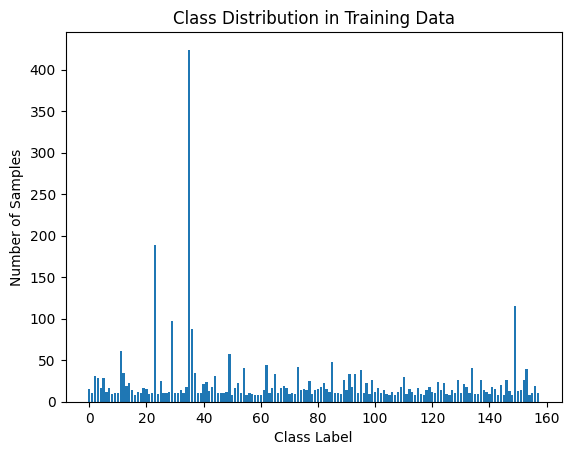

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train_LBP, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500)
clf.fit(X_train_scaled, y_train_LBP)
y_pred = clf.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_LBP, y_pred))

Logistic Regression Accuracy: 0.5699421965317919


In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier

k = int(math.sqrt(len(y_train_LBP)))  # sqrt(3459) ≈ 59
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

knn.fit(X_train_scaled, y_train_LBP)
y_pred_knn = knn.predict(X_test_scaled)

print("Tuned KNN Accuracy:", accuracy_score(y_test_LBP, y_pred_knn))

Tuned KNN Accuracy: 0.12716763005780346


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train_LBP_pca, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = knn.predict(X_test_LBP_pca)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy:.4f}')

KNN Accuracy: 0.2300


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_LBP, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.08      0.25      0.12         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.43      0.19      0.26        16
          12       0.20      0.12      0.15         8
          13       1.00      0.20      0.33         5
          14       0.08      0.17      0.11         6
          15       0.07      0.33      0.12         3
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
